<a href="https://colab.research.google.com/github/springboardmentor1979b-cmyk/ScoreSight---Predicting-EPL-Points-Tally-Top-Scorer/blob/Anuja-Waykul/Anuja_EPLPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Scoredataset.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows of the dataset
df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [ ]:
# Display the last 5 rows of the dataset
df.tail(5)

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
570,Leonardo Campana,30.0,Wolverhampton-Wanderers,Forward,Ecuador,20.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [ ]:
# Return the number of rows and columns in the dataset
df.shape

(571, 59)

In [ ]:
# Show summary statistics for numerical columns
df.describe()

,Jersey Number,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
count,563.000000,570.000000,571.000000,571.000000,571.000000,571.000000,309.000000,502.000000,502.000000,502.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,571.000000,571.000000,571.000000,502.000000
mean,19.534636,25.789474,68.823117,28.957968,23.896673,7.327496,2.648414,1.414343,4.468127,2.388446,...,24.652174,45.869565,20.782609,25.565217,210.000000,414.144928,7.917688,0.301226,53.033275,11.063745
std,14.273515,4.377354,81.797516,38.969376,28.488376,16.810490,8.002117,3.433374,11.048341,6.295652,...,46.282644,82.332167,43.058397,47.333758,334.822473,641.246265,11.556811,0.698607,75.605560,26.570058
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,22.000000,3.000000,1.000000,1.000000,0.000000,0.050000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,26.000000,36.000000,12.000000,14.000000,1.000000,0.140000,0.000000,1.000000,0.000000,...,2.000000,6.000000,3.000000,4.000000,39.000000,53.000000,3.000000,0.000000,22.000000,2.000000
75%,27.000000,29.000000,108.000000,41.000000,36.000000,6.000000,0.390000,1.000000,3.000000,2.000000,...,31.000000,45.000000,17.000000,28.000000,300.000000,527.000000,11.000000,0.000000,74.000000,8.750000
max,82.000000,38.000000,539.000000,272.000000,158.000000,180.000000,57.000000,31.000000,127.000000,63.000000,...,269.000000,391.000000,249.000000,257.000000,1516.000000,2806.000000,81.000000,5.000000,438.000000,203.000000


In [ ]:
# Provide information about column names, non-null counts, and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

In [ ]:
# Indicate which values are null
df.isnull()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
568,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
569,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False


In [ ]:
# Count the number of null values in each column
df.isnull().sum()

,0
Name,0
Jersey Number,8
Club,0
Position,0
Nationality,1
Age,1
Appearances,0
Wins,0
Losses,0
Goals,0


In [ ]:
# Checks what each column represents
df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [ ]:
# Identify which columns are useful
useful_cols = ["Goals", "Assists", "Appearances", "Shots", "Shooting accuracy %", "Cross accuracy %", ]

# Identify which columns are Irrelevant
irrelevant_cols = ['Jersey Number', 'Nationality']

# Clean useful columns
for col in useful_cols:
    if col in df.columns:
        # Handle percentage columns by converting them to numeric
        if df[col].dtype == 'object' and '%' in df[col].astype(str).str.cat(sep=''):
            df[col] = df[col].astype(str).str.replace('%', '').astype(float)

        # Replace 0 with NA
        df[col] = df[col].replace(0, pd.NA)

        # Compute mean of non-zero values
        mean_val = df[col].mean()

        # Fill missing or zero values with mean
        df[col] = df[col].fillna(mean_val)

# Display cleaned useful columns
df[useful_cols]

/tmp/ipython-input-2615001361.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mean_val)
/tmp/ipython-input-2615001361.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mean_val)
/tmp/ipython-input-2615001361.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fil

,Goals,Assists,Appearances,Shots,Shooting accuracy %,Cross accuracy %
0,13.198738,9.090361,64.000000,119.524528,33.441509,20.990099
1,13.198738,9.090361,81.700624,119.524528,33.441509,20.990099
2,13.198738,9.090361,81.700624,119.524528,33.441509,20.990099
3,7.000000,18.000000,160.000000,119.524528,33.441509,16.000000
4,1.000000,1.000000,16.000000,119.524528,33.441509,18.000000
...,...,...,...,...,...,...
566,3.000000,4.000000,31.000000,19.000000,32.000000,20.990099
567,32.000000,13.000000,78.000000,237.000000,35.000000,20.990099
568,5.000000,12.000000,105.000000,78.000000,27.000000,20.990099
569,13.198738,9.090361,1.000000,119.524528,33.441509,20.990099


In [ ]:
# Sort dataset by Goals
df_sorted = df.sort_values(by='Goals')
print(df_sorted)

                Name  Jersey Number               Club    Position  \
26      Reiss Nelson           24.0            Arsenal     Forward   
21       Bukayo Saka            7.0            Arsenal  Midfielder   
545     Jarrod Bowen           20.0    West-Ham-United     Forward   
41     Kortney Hause           30.0        Aston-Villa    Defender   
529  Ryan Fredericks           24.0    West-Ham-United    Defender   
..               ...            ...                ...         ...   
342  Raheem Sterling            7.0    Manchester-City     Forward   
313       Sadio Mané           10.0          Liverpool     Forward   
281      Jamie Vardy            9.0     Leicester-City     Forward   
489       Harry Kane           10.0  Tottenham-Hotspur     Forward   
344    Sergio Agüero           10.0    Manchester-City     Forward   

    Nationality   Age  Appearances  Wins  Losses  Goals  ...  Punches  \
26      England  20.0         20.0    10       5    1.0  ...      NaN   
21      Engla

In [ ]:
categorical_cols = ['Club', 'Position']
# Encode categorical values
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Save cleaned dataset
# Path to save cleaned CSV
df_encoded.to_csv('/content/drive/MyDrive/Scoredataset_cleaned_dataset.csv', index=False)

print("Saved cleaned_dataset.csv successfully!")

Saved cleaned_dataset.csv successfully!


In [ ]:
# Identify categorical columns
categorical_cols = ['Club', 'Position']

# Encode categorical values
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

,Name,Jersey Number,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,...,Club_Newcastle-United,Club_Sheffield-United,Club_Southampton,Club_Tottenham-Hotspur,Club_West-Bromwich-Albion,Club_West-Ham-United,Club_Wolverhampton-Wanderers,Position_Forward,Position_Goalkeeper,Position_Midfielder
0,Bernd Leno,1.0,Germany,28.0,64.000000,28,16,13.198738,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False
1,Matt Macey,33.0,England,26.0,81.700624,0,0,13.198738,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False
2,Rúnar Alex Rúnarsson,13.0,Iceland,25.0,81.700624,0,0,13.198738,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False
3,Héctor Bellerín,2.0,Spain,25.0,160.000000,90,37,7.000000,NaN,0.0,...,False,False,False,False,False,False,False,False,False,False
4,Kieran Tierney,3.0,Scotland,23.0,16.000000,7,5,1.000000,NaN,0.0,...,False,False,False,False,False,False,False,False,False,False


Exploratory data analysis

In [ ]:
import matplotlib.pyplot as plt

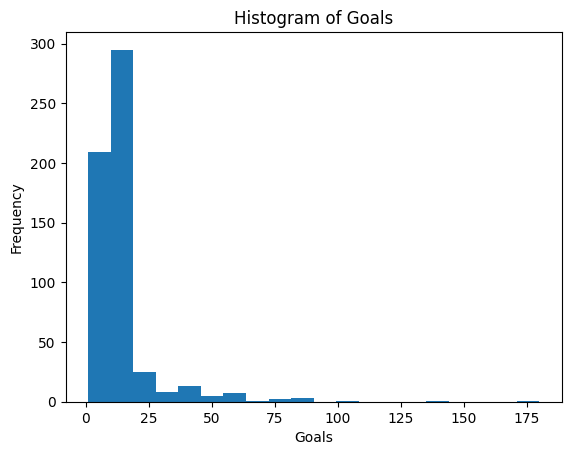

In [ ]:
# 1. Histogram – Goals vs Frequency
plt.hist(df["Goals"], bins=20)
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.title("Histogram of Goals")
plt.show()

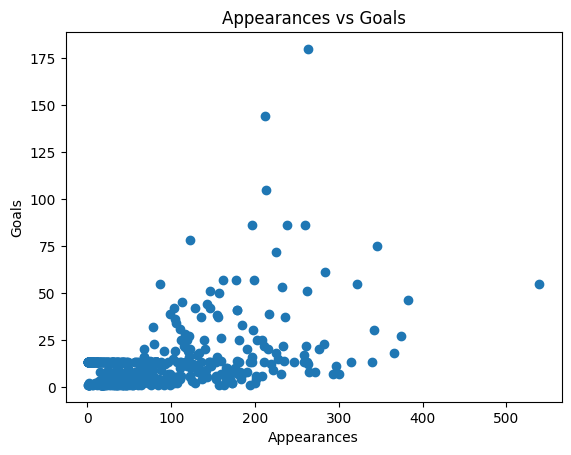

In [ ]:
# 2. Scatter Plot – Appearances vs Goals
plt.scatter(df["Appearances"], df["Goals"])
plt.xlabel("Appearances")
plt.ylabel("Goals")
plt.title("Appearances vs Goals")
plt.show()

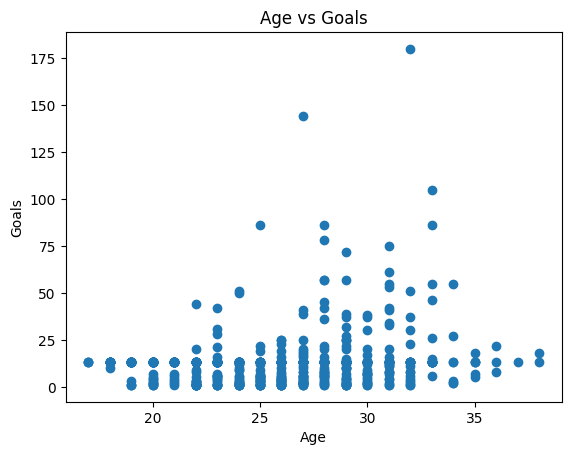

In [ ]:
# 3. Scatter Plot – Age vs Goals
plt.scatter(df["Age"], df["Goals"])
plt.xlabel("Age")
plt.ylabel("Goals")
plt.title("Age vs Goals")
plt.show()

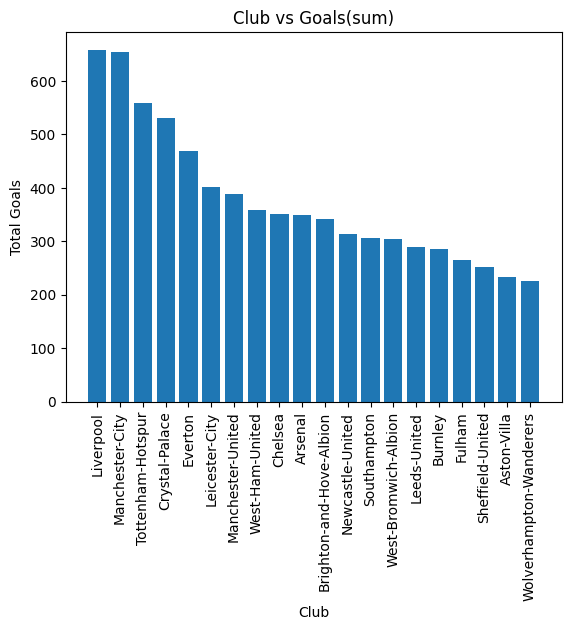

In [ ]:
# 4. Bar Chart – Club vs Goals(sum)
club_goals = df.groupby("Club")["Goals"].sum().sort_values(ascending=False)
plt.bar(club_goals.index, club_goals.values)
plt.xticks(rotation=90)
plt.xlabel("Club")
plt.ylabel("Total Goals")
plt.title("Club vs Goals(sum)")
plt.show()

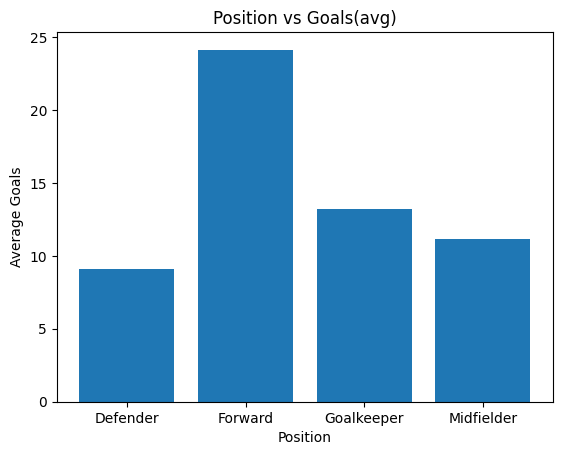

In [ ]:
# 5. Bar Chart – Position vs Goals(avg)
pos_goals_avg = df.groupby("Position")["Goals"].mean()
plt.bar(pos_goals_avg.index, pos_goals_avg.values)
plt.xlabel("Position")
plt.ylabel("Average Goals")
plt.title("Position vs Goals(avg)")
plt.show()

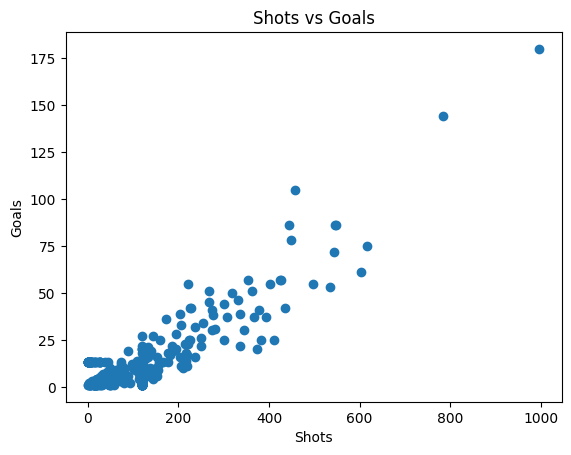

In [ ]:
# 6. Scatter Plot – Shots vs Goals
plt.scatter(df["Shots"], df["Goals"])
plt.xlabel("Shots")
plt.ylabel("Goals")
plt.title("Shots vs Goals")
plt.show()

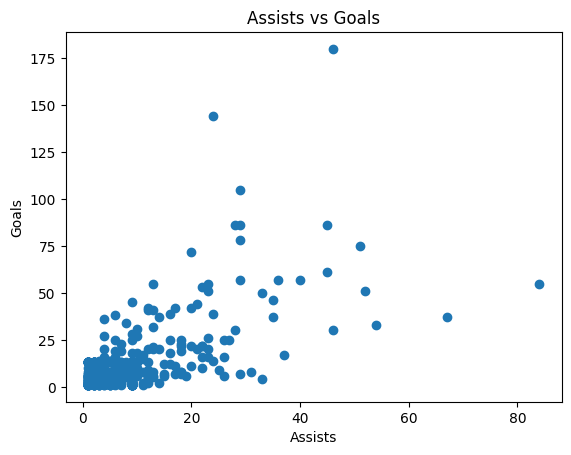

In [ ]:
# 7. Scatter Plot – Assists vs Goals
plt.scatter(df["Assists"], df["Goals"])
plt.xlabel("Assists")
plt.ylabel("Goals")
plt.title("Assists vs Goals")
plt.show()

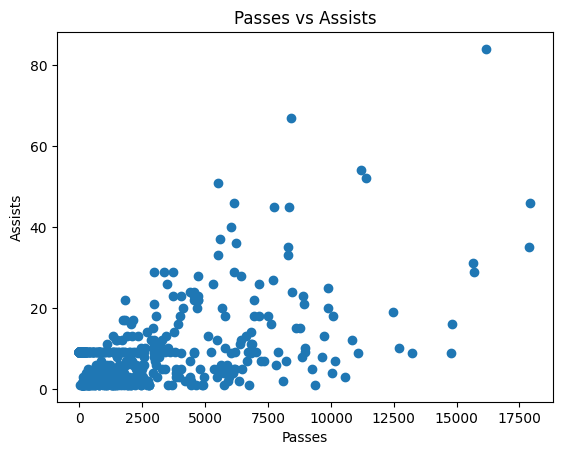

In [ ]:
# 8. Scatter Plot – Passes vs Assists
plt.scatter(df["Passes"], df["Assists"])
plt.xlabel("Passes")
plt.ylabel("Assists")
plt.title("Passes vs Assists")
plt.show()

/tmp/ipython-input-2688773575.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Tackle success %"].fillna(mean_val_tackle_success, inplace=True)
/tmp/ipython-input-2688773575.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Tackle success %"].fillna(mean_val_tackle_success, inplace=True)


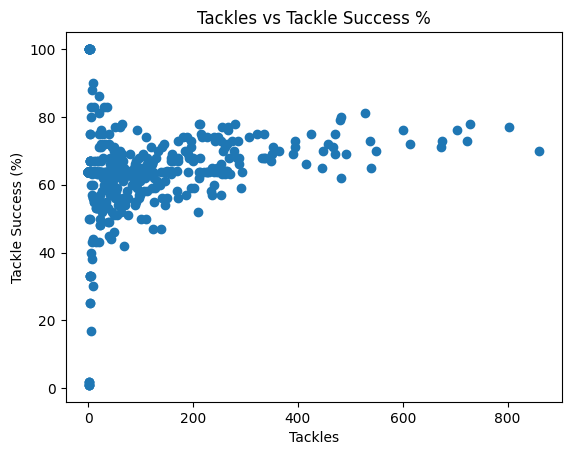

In [ ]:
# 9. Scatter Plot – Tackles vs Tackle success %
# Clean 'Tackle success %' column
if df["Tackle success %"].dtype == 'object':
    df["Tackle success %"] = df["Tackle success %"].astype(str).str.replace('%', '')
    df["Tackle success %"] = pd.to_numeric(df["Tackle success %"], errors='coerce')

# Replace 0 with NaN if 0 is not a meaningful value for 'Tackle success %'
df["Tackle success %"] = df["Tackle success %"].replace(0, pd.NA)

# Fill NaN values with the mean of the column
mean_val_tackle_success = df["Tackle success %"].mean()
df["Tackle success %"].fillna(mean_val_tackle_success, inplace=True)

plt.scatter(df["Tackles"], df["Tackle success %"])
plt.xlabel("Tackles")
plt.ylabel("Tackle Success (%)")
plt.title("Tackles vs Tackle Success %")
plt.show()

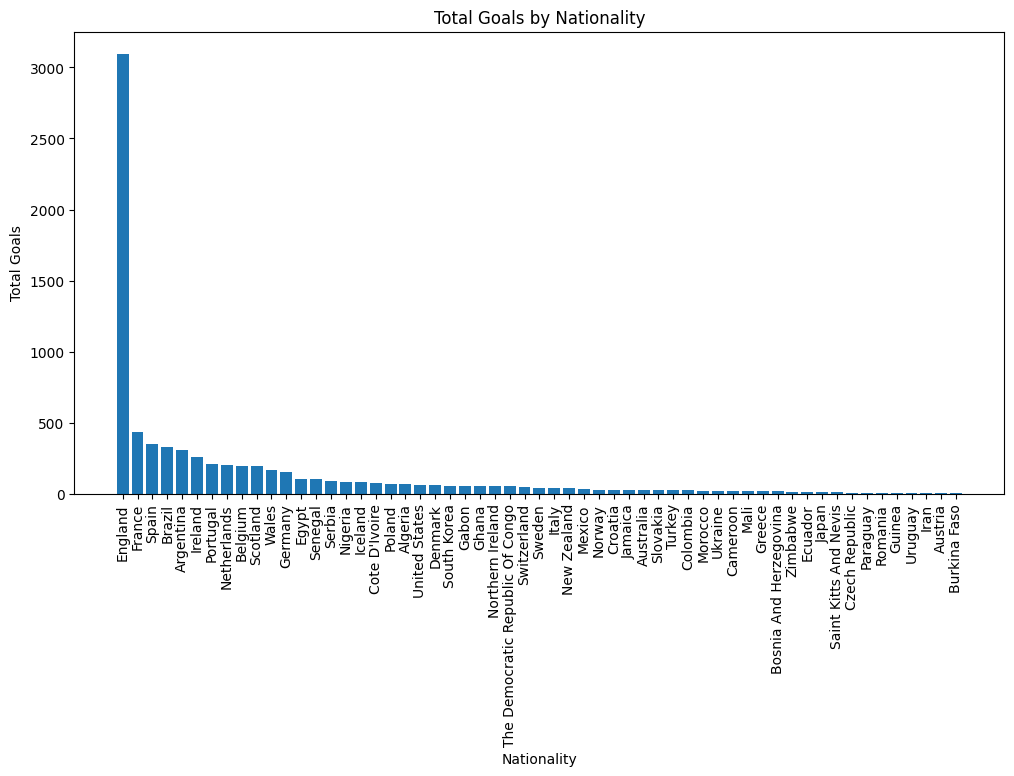

In [ ]:
# 10. Bar Chart – Nationality vs Goals (sum)
nat_goals = df.groupby("Nationality")["Goals"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.bar(nat_goals.index, nat_goals.values)
plt.xticks(rotation=90)
plt.xlabel("Nationality")
plt.ylabel("Total Goals")
plt.title("Total Goals by Nationality")
plt.show()


Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# Step1: Print raw values of Goals, Appearances and Passes
print("Raw Values:")
print(df[["Goals", "Appearances", "Passes"]].head())

Raw Values:
       Goals  Appearances  Passes
0  13.198738    64.000000    1783
1  13.198738    81.700624       0
2  13.198738    81.700624       0
3   7.000000   160.000000    7125
4   1.000000    16.000000     519


In [ ]:
# Step2:Apply Min-Max Scaler for Goals ,Appearances, Passes, Assists
minmax = MinMaxScaler()
minmax_cols = ["Goals", "Appearances", "Passes", "Assists"]
df_minmax = df.copy()
df_minmax[minmax_cols] = minmax.fit_transform(df[minmax_cols])
print("Min-Max Scaled Values:")
print(df_minmax[minmax_cols].head())

Min-Max Scaled Values:
      Goals  Appearances    Passes   Assists
0  0.068149     0.117100  0.099431  0.097474
1  0.068149     0.150001  0.000000  0.097474
2  0.068149     0.150001  0.000000  0.097474
3  0.033520     0.295539  0.397334  0.204819
4  0.000000     0.027881  0.028943  0.000000


In [ ]:
# Step3:Apply Standardization (z-score) for Goals, shots, Passes
standard = StandardScaler()
standard_cols = ["Goals", "Shots", "Passes"]
df_standard = df.copy()
df_standard[standard_cols] = standard.fit_transform(df[standard_cols])
print("Standardized (Z-Score) Values:")
print(df_standard[standard_cols].head())

Standardized (Z-Score) Values:
      Goals  Shots    Passes
0  0.000000    0.0 -0.168573
1  0.000000    0.0 -0.739227
2  0.000000    0.0 -0.739227
3 -0.400899    0.0  1.541148
4 -0.788945    0.0 -0.573119


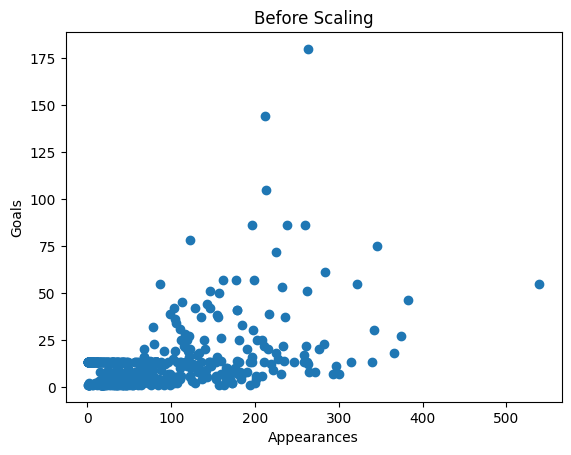

In [ ]:
# Step4:Plot scatter for:
# before scaling
plt.figure()
plt.scatter(df["Appearances"], df["Goals"])
plt.xlabel("Appearances")
plt.ylabel("Goals")
plt.title("Before Scaling")
plt.show()

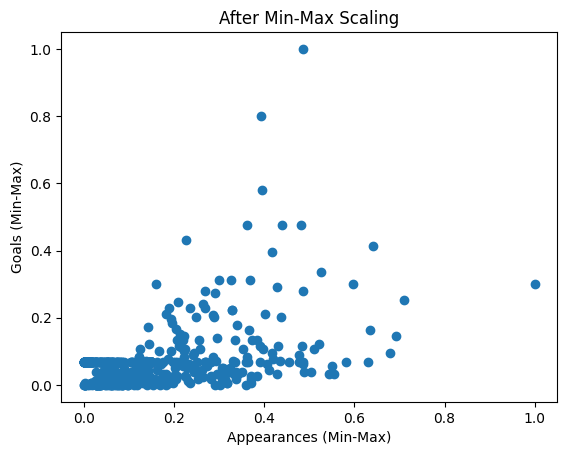

In [ ]:
# After scaling
plt.figure()
plt.scatter(df_minmax["Appearances"], df_minmax["Goals"])
plt.xlabel("Appearances (Min-Max)")
plt.ylabel("Goals (Min-Max)")
plt.title("After Min-Max Scaling")
plt.show()

Train and Test split

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# For Regression Target (Player Performance → Goals)
X_reg = df.select_dtypes(include="number").drop("Goals", axis=1)
y_reg = df["Goals"]

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42
)

In [ ]:
# For Classification Target (Match Outcome: Win / Draw / Loss)
def match_result(row):
    if row["Wins"] > row["Losses"]:
        return "Win"
    elif row["Wins"] < row["Losses"]:
        return "Loss"
    else:
        return "Draw"

df["Match_Result"] = df.apply(match_result, axis=1)

le = LabelEncoder()
df["Match_Result"] = le.fit_transform(df["Match_Result"])

X_clf = df.select_dtypes(include="number").drop("Match_Result", axis=1)
y_clf = df["Match_Result"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clf, y_clf, test_size=0.25, random_state=42
)

Baseline Regression Model

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Impute missing values with the mean before training
imputer = SimpleImputer(strategy='mean')
Xr_train_imputed = imputer.fit_transform(Xr_train)
Xr_test_imputed = imputer.transform(Xr_test)

lr = LinearRegression()
lr.fit(Xr_train_imputed, yr_train)
yr_pred_lr = lr.predict(Xr_test_imputed)

In [ ]:
# Logistic Regression (Classification)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Impute missing values with the mean before training
imputer = SimpleImputer(strategy='mean')
Xc_train_imputed = imputer.fit_transform(Xc_train)
Xc_test_imputed = imputer.transform(Xc_test)

# Scale the data after imputation
scaler = StandardScaler()
Xc_train_scaled = scaler.fit_transform(Xc_train_imputed)
Xc_test_scaled = scaler.transform(Xc_test_imputed)

log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(Xc_train_scaled, yc_train)
yc_pred_log = log_reg.predict(Xc_test_scaled)

Model Evaluation

In [ ]:
# Regression Metrics
# MAE, RMSE, R² for regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(yr_test, yr_pred_lr)
rmse = np.sqrt(mean_squared_error(yr_test, yr_pred_lr))
r2 = r2_score(yr_test, yr_pred_lr)

print("Linear Regression:")
print("MAE:", mae
print("RMSE:", rmse)
print("R2:", r2)

Linear Regression:
MAE: 2.592016358670784
RMSE: 3.5282188867367124
R2: 0.8771650134995416


In [ ]:
# Classification Metrics
# Accuracy, Precision, Recall, F1 for classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Logistic Regression:")
print("Accuracy:", accuracy_score(yc_test, yc_pred_log))
print("Precision:", precision_score(yc_test, yc_pred_log, average="weighted"))
print("Recall:", recall_score(yc_test, yc_pred_log, average="weighted"))
print("F1:", f1_score(yc_test, yc_pred_log, average="weighted"))

Logistic Regression:
Accuracy: 0.8881118881118881
Precision: 0.8920488924357397
Recall: 0.8881118881118881
F1: 0.8882575757575757


Visualization

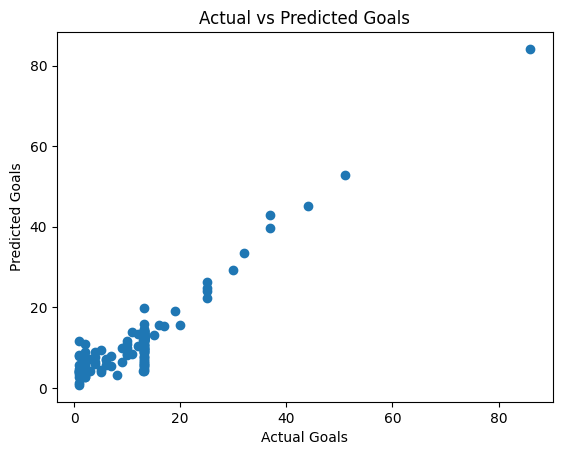

In [ ]:
# Actual vs predicted (Regression) scatter plots
import matplotlib.pyplot as plt
plt.scatter(yr_test, yr_pred_lr)
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Actual vs Predicted Goals")
plt.show()

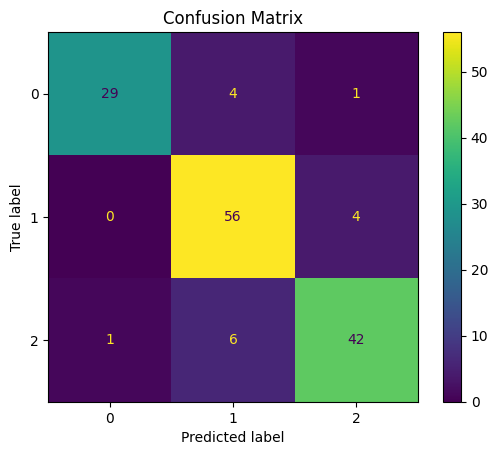

In [ ]:
# Confusion matrix (Classification) for match outcomes
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(yc_test, yc_pred_log)
plt.title("Confusion Matrix")
plt.show()

Advanced Models

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(Xr_train, yr_train)
yr_pred_rf = rf_reg.predict(Xr_test)

In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer

# Impute missing values with the mean before training
imputer = SimpleImputer(strategy='mean')
Xc_train_imputed = imputer.fit_transform(Xc_train)
Xc_test_imputed = imputer.transform(Xc_test)

gb_clf = GradientBoostingClassifier()
gb_clf.fit(Xc_train_imputed, yc_train)
yc_pred_gb = gb_clf.predict(Xc_test_imputed)

Hyperparameter Tuning

In [ ]:
# GridSearchCV – Random Forest Regressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20]
}
grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring="r2"
)
grid_rf.fit(Xr_train, yr_train)
best_rf = grid_rf.best_estimator_

In [ ]:
# RandomizedSearchCV – Gradient Boosting Classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer

# Impute missing values with the mean before training
imputer = SimpleImputer(strategy='mean')
Xc_train_imputed = imputer.fit_transform(Xc_train)
Xc_test_imputed = imputer.transform(Xc_test)

param_dist = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 0.2]
}
rand_gb = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_dist,
    cv=3,
    n_iter=5
)
rand_gb.fit(Xc_train_imputed, yc_train) # Fit with imputed data
best_gb = rand_gb.best_estimator_

Performance Comparison

In [ ]:
# Regression Comparison
print("Linear Regression R2:", r2_score(yr_test, yr_pred_lr))
print("Random Forest R2:", r2_score(yr_test, best_rf.predict(Xr_test)))

Linear Regression R2: 0.8771650134995416
Random Forest R2: 0.8967429238511037


In [ ]:
# Classification Comparison
print("Logistic Accuracy:",
      accuracy_score(yc_test, yc_pred_log))

print("Gradient Boosting Accuracy:",
      accuracy_score(yc_test, best_gb.predict(Xc_test_imputed)))

Logistic Accuracy: 0.8881118881118881
Gradient Boosting Accuracy: 0.9440559440559441
